# 금융 통계 실습 07 - 상관분석

### [금융 데이터 분석 입문]
#### 이승준 http://fb.com/plusjune

In [1]:
%matplotlib inline

## 코스피 시총 상위 (2015-06-30)
* 한국거래소 홈페이지 데이터
* https://goo.gl/Hu8iN7

## 여러 종목의 가격

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime

from pandas_datareader import data, wb

# KOSPI지수, 시가총액 상위 10 

In [3]:
syms = [
    '^KS11', # 코스피 지수
    '005930.KS', # 삼성전자
    '000660.KS', # SK하이닉스
    '005380.KS', # 현대차
    '015760.KS', # 한국전력
    '090430.KS', # 아모레퍼시픽
    '028260.KS', # 제일모직
    '005935.KS', # 삼성전자우
    '032830.KS', # 삼성생명
    '035420.KS', # NAVER
    '012330.KS', # 현대모비스
]

## 종목별 가격 데이터 읽기

In [4]:
start = datetime(2015, 1 ,1)
end = datetime(2015, 12, 31)

p = data.get_data_yahoo(syms, start=start, end=end)
p

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 261 (major_axis) x 11 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2015-01-01 00:00:00 to 2015-12-31 00:00:00
Minor_axis axis: 000660.KS to ^KS11

In [5]:
df = p['Adj Close']
df.head()

,000660.KS,005380.KS,005930.KS,005935.KS,012330.KS,015760.KS,028260.KS,032830.KS,035420.KS,090430.KS,^KS11
Date,,,,,,,,,,,
2015-01-01,46977.35,164415.40,1305014.42,NaN,232689.37,40020.45,157429.60,114584.93,710778.15,221269.03,NaN
2015-01-02,46977.35,164415.40,1307964.71,996040.22,236140.28,40020.45,170382.67,113109.59,729745.55,232232.81,1926.439941
2015-01-05,46878.96,163442.53,1310915.01,991138.45,234661.32,39364.37,144974.73,115076.71,747714.66,229940.38,1915.750000
2015-01-06,46731.39,160037.48,1273544.59,985256.32,225787.57,39223.79,138000.00,113601.37,741724.95,223162.77,1882.449951
2015-01-07,46633.01,165388.27,1285345.77,981334.90,227266.53,40442.21,135010.83,115568.49,730743.83,213694.05,1883.829956


In [6]:
len(df)

261

In [7]:
start = datetime(2014, 1 ,1)
end = datetime(2014, 12, 31)

p = data.get_data_yahoo(syms, start=start, end=end)
mask = p['Volume']['^KS11'] > 0
df = p['Adj Close'].ix[mask]

In [8]:
len(df)

238

In [9]:
df.head()

,000660.KS,005380.KS,005930.KS,005935.KS,012330.KS,015760.KS,028260.KS,032830.KS,035420.KS,090430.KS,^KS11
Date,,,,,,,,,,,
2014-01-02,34751.51,214654.91,1268266.80,950952.85,271640.41,32004.91,NaN,98315.08,722986.86,96344.75,1967.189941
2014-01-03,35484.67,214176.84,1255671.34,930760.72,268719.55,31727.01,NaN,97346.46,697059.06,93187.47,1946.140015
2014-01-06,36804.35,218479.50,1266329.04,949029.79,272127.22,32653.35,NaN,98315.08,697059.06,93761.52,1953.280029
2014-01-07,36950.98,218957.57,1263422.39,937491.43,270179.98,32977.56,NaN,98315.08,698056.28,92996.12,1959.439941
2014-01-08,38124.02,219435.64,1250826.92,937491.43,268719.55,32792.30,NaN,97830.77,698056.28,94239.90,1958.959961


# 심볼+이름

In [10]:
syms_names = {}

url_tmp = 'http://finance.yahoo.com/d/quotes.csv?s=%s&f=%s' 
for sym in syms:
    url = url_tmp % (sym, 'n')
    r = requests.get(url)
    name = r.text.replace('"', '').strip()
    print (name)
    syms_names[sym] = name
    
print (syms_names)

KOSPI Composite Index
Samsung Electronics
SK hynix
HyundaiMtr
KEPCO
AMOREPACIFIC
SAMSUNG C&T
Samsung Electronics (Preferred)
SAMSUNG LIFE
NAVER
Mobis
{'015760.KS': 'KEPCO', '035420.KS': 'NAVER', '090430.KS': 'AMOREPACIFIC', '028260.KS': 'SAMSUNG C&T', '000660.KS': 'SK hynix', '005935.KS': 'Samsung Electronics (Preferred)', '012330.KS': 'Mobis', '005930.KS': 'Samsung Electronics', '^KS11': 'KOSPI Composite Index', '005380.KS': 'HyundaiMtr', '032830.KS': 'SAMSUNG LIFE'}


## 컬럼 이름 바꾸기

In [11]:
df = df.rename(columns=syms_names)
df.head()

,SK hynix,HyundaiMtr,Samsung Electronics,Samsung Electronics (Preferred),Mobis,KEPCO,SAMSUNG C&T,SAMSUNG LIFE,NAVER,AMOREPACIFIC,KOSPI Composite Index
Date,,,,,,,,,,,
2014-01-02,34751.51,214654.91,1268266.80,950952.85,271640.41,32004.91,NaN,98315.08,722986.86,96344.75,1967.189941
2014-01-03,35484.67,214176.84,1255671.34,930760.72,268719.55,31727.01,NaN,97346.46,697059.06,93187.47,1946.140015
2014-01-06,36804.35,218479.50,1266329.04,949029.79,272127.22,32653.35,NaN,98315.08,697059.06,93761.52,1953.280029
2014-01-07,36950.98,218957.57,1263422.39,937491.43,270179.98,32977.56,NaN,98315.08,698056.28,92996.12,1959.439941
2014-01-08,38124.02,219435.64,1250826.92,937491.43,268719.55,32792.30,NaN,97830.77,698056.28,94239.90,1958.959961


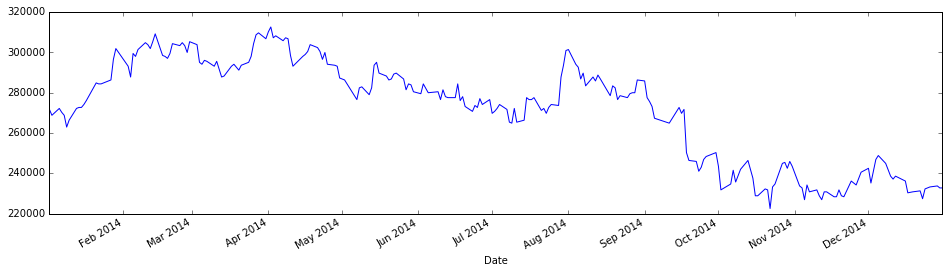

In [12]:
df['Mobis'].plot(figsize=(16,4))

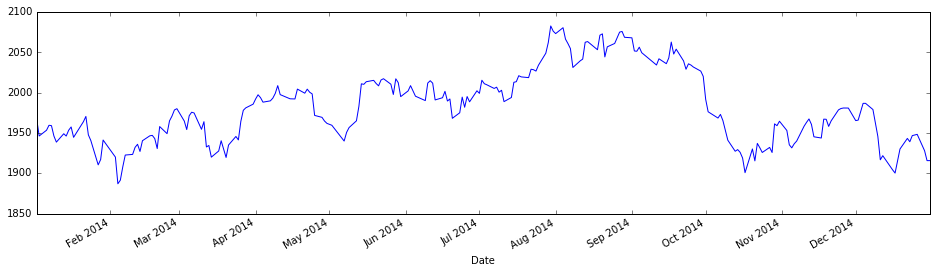

In [13]:
df['KOSPI Composite Index'].plot(figsize=(16,4))

## 등락률 (전일 대비)

In [14]:
changes = df.pct_change()
changes.head()

,SK hynix,HyundaiMtr,Samsung Electronics,Samsung Electronics (Preferred),Mobis,KEPCO,SAMSUNG C&T,SAMSUNG LIFE,NAVER,AMOREPACIFIC,KOSPI Composite Index
Date,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.021097,-0.002227,-0.009931,-0.021234,-0.010753,-0.008683,NaN,-0.009852,-0.035862,-0.032771,-0.010701
2014-01-06,0.037190,0.020089,0.008488,0.019628,0.012681,0.029197,NaN,0.009950,0.000000,0.006160,0.003669
2014-01-07,0.003984,0.002188,-0.002295,-0.012158,-0.007156,0.009929,NaN,0.000000,0.001431,-0.008163,0.003154
2014-01-08,0.031746,0.002183,-0.009969,0.000000,-0.005405,-0.005618,NaN,-0.004926,0.000000,0.013375,-0.000245


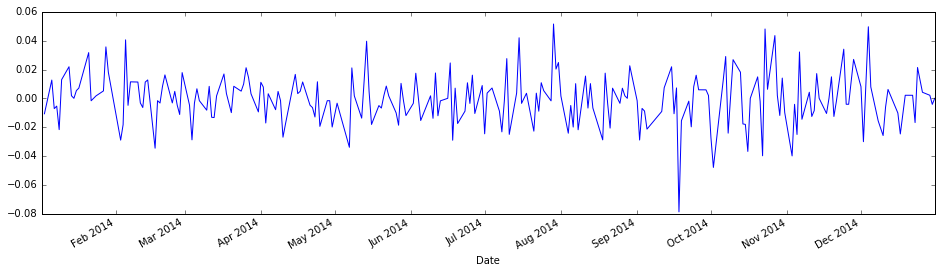

In [15]:
changes['Mobis'].plot(figsize=(16,4))

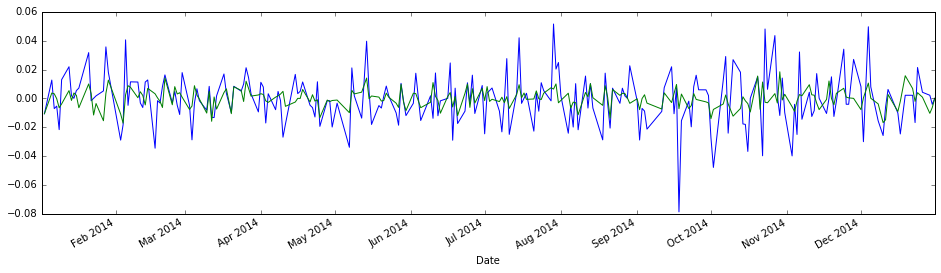

In [16]:
changes = df.pct_change()
changes['Mobis'].plot(figsize=(16,4))
changes['KOSPI Composite Index'].plot(figsize=(16,4))

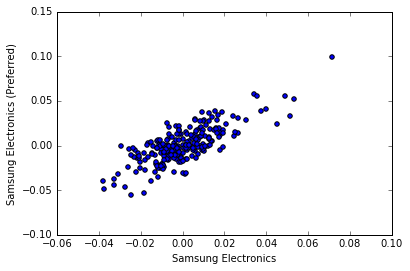

In [17]:
plt.scatter(changes['Samsung Electronics'], changes['Samsung Electronics (Preferred)'])
plt.xlabel('Samsung Electronics')
plt.ylabel('Samsung Electronics (Preferred)')

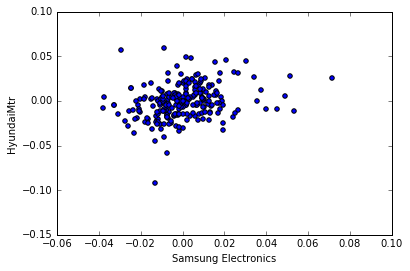

In [18]:
plt.scatter(changes['Samsung Electronics'], changes['HyundaiMtr'])
plt.xlabel('Samsung Electronics')
plt.ylabel('HyundaiMtr')

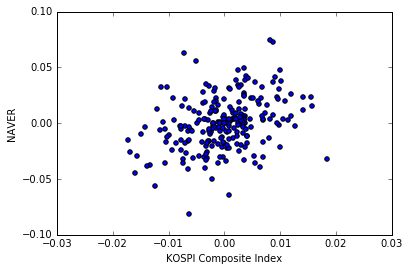

In [19]:
plt.scatter(changes['KOSPI Composite Index'], changes['NAVER'])
plt.xlabel('KOSPI Composite Index')
plt.ylabel('NAVER')

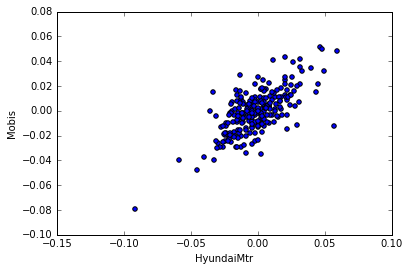

In [20]:
plt.scatter(changes['HyundaiMtr'], changes['Mobis'])
plt.xlabel('HyundaiMtr')
plt.ylabel('Mobis')

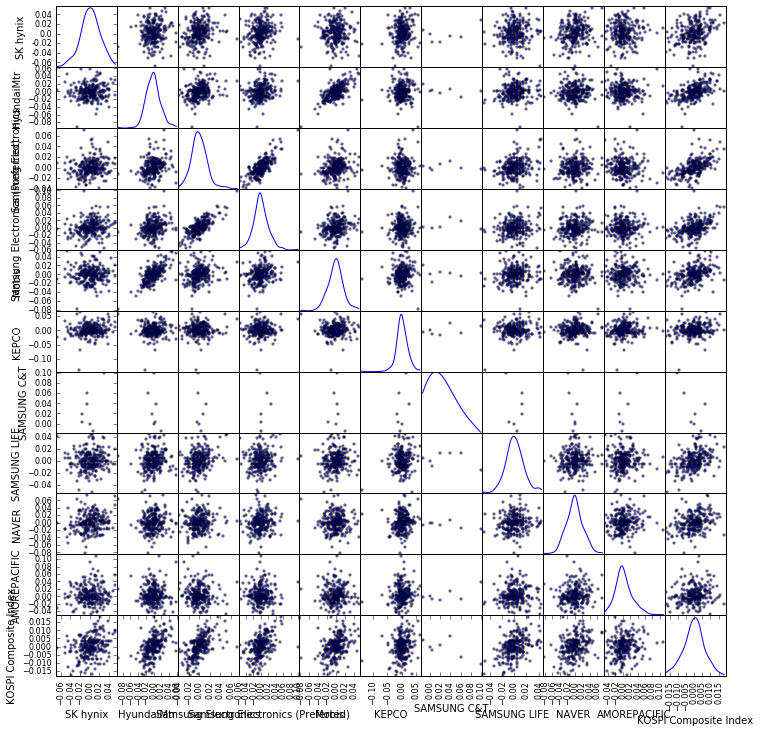

In [21]:
changes = df.pct_change()
pd.scatter_matrix(changes, diagonal='kde', figsize=(12, 12));

## 상위 10개 종목 상관관계 차트

In [22]:
corr = changes.corr()
corr

,SK hynix,HyundaiMtr,Samsung Electronics,Samsung Electronics (Preferred),Mobis,KEPCO,SAMSUNG C&T,SAMSUNG LIFE,NAVER,AMOREPACIFIC,KOSPI Composite Index
SK hynix,1.000000,0.066779,0.166341,0.178146,0.001798,0.141248,0.545474,0.058417,0.178661,0.062171,0.308034
HyundaiMtr,0.066779,1.000000,0.268184,0.237778,0.692799,-0.000775,-0.535312,0.105561,0.030537,-0.018473,0.505858
Samsung Electronics,0.166341,0.268184,1.000000,0.771678,0.223979,0.026866,-0.140082,0.267070,0.069761,-0.090591,0.565236
Samsung Electronics (Preferred),0.178146,0.237778,0.771678,1.000000,0.225650,0.070241,0.136123,0.119014,0.124076,0.004499,0.462604
Mobis,0.001798,0.692799,0.223979,0.225650,1.000000,0.032031,-0.191716,0.095242,-0.044201,-0.023647,0.398527
KEPCO,0.141248,-0.000775,0.026866,0.070241,0.032031,1.000000,0.472300,0.119383,0.100210,0.110954,0.185995
SAMSUNG C&T,0.545474,-0.535312,-0.140082,0.136123,-0.191716,0.472300,1.000000,-0.227417,-0.623446,0.708167,-0.703830
SAMSUNG LIFE,0.058417,0.105561,0.267070,0.119014,0.095242,0.119383,-0.227417,1.000000,0.071500,0.033258,0.414999
NAVER,0.178661,0.030537,0.069761,0.124076,-0.044201,0.100210,-0.623446,0.071500,1.000000,0.118209,0.335176
AMOREPACIFIC,0.062171,-0.018473,-0.090591,0.004499,-0.023647,0.110954,0.708167,0.033258,0.118209,1.000000,0.159926


## 상위 10개 종목 상관관계 히트맵

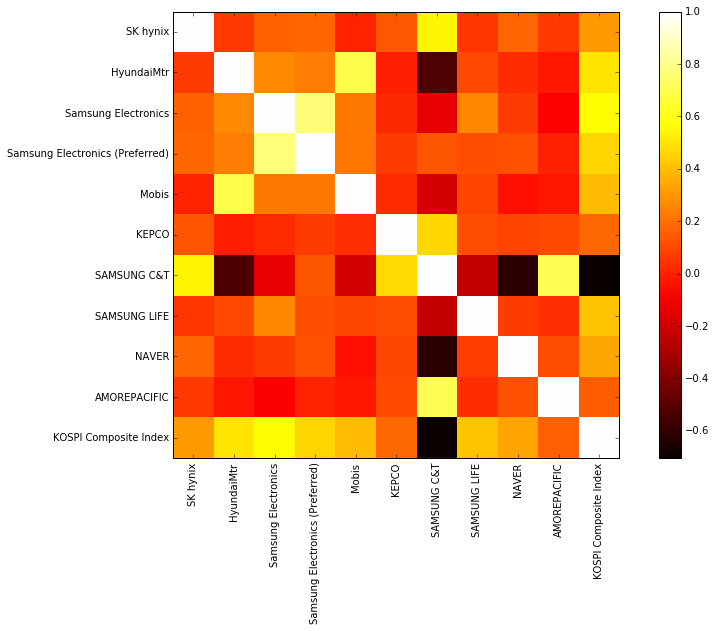

In [23]:
corr = changes.corr()

plt.figure(figsize=(14,8))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

## 상관계수 순위 만들기

In [24]:
idx = []; vals = []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j]) 

ser = pd.Series(data=vals, index=idx)
ser.head(10)

(SK hynix, HyundaiMtr)                         0.066779
(SK hynix, Samsung Electronics)                0.166341
(SK hynix, Samsung Electronics (Preferred))    0.178146
(SK hynix, Mobis)                              0.001798
(SK hynix, KEPCO)                              0.141248
(SK hynix, SAMSUNG C&T)                        0.545474
(SK hynix, SAMSUNG LIFE)                       0.058417
(SK hynix, NAVER)                              0.178661
(SK hynix, AMOREPACIFIC)                       0.062171
(SK hynix, KOSPI Composite Index)              0.308034
dtype: float64

In [25]:
idx = []; vals = []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j]) 

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)

# top10
ser_ord[:10] 


(Samsung Electronics, Samsung Electronics (Preferred))      0.771678
(SAMSUNG C&T, AMOREPACIFIC)                                 0.708167
(HyundaiMtr, Mobis)                                         0.692799
(Samsung Electronics, KOSPI Composite Index)                0.565236
(SK hynix, SAMSUNG C&T)                                     0.545474
(HyundaiMtr, KOSPI Composite Index)                         0.505858
(KEPCO, SAMSUNG C&T)                                        0.472300
(Samsung Electronics (Preferred), KOSPI Composite Index)    0.462604
(SAMSUNG LIFE, KOSPI Composite Index)                       0.414999
(Mobis, KOSPI Composite Index)                              0.398527
dtype: float64

## 종목간 상관계수

In [26]:

code_names = {
    '^KS11':'KOSPI',
    '005930.KS':'삼성전자', 
    '005380.KS':'현대차', 
    '035420.KS':'네이버', 
    '006280.KS':'녹십자',
    '012750.KS':'에스원',
    '003490.KS':'대한항공',
    '000210.KS':'대림산업',
    '004990.KS':'롯데제과',
    '192400.KS':'쿠쿠전자',
    '007310.KS':'오뚜기' }

start=datetime(2014, 1, 1)
end=datetime(2014, 12, 31)

df = data.get_data_yahoo(list(code_names.keys()), start=start, end=end)
df = df['Adj Close']
df = df.rename(columns=code_names)
chg = df.pct_change()
chg_corr = chg.corr()
chg_corr

,대림산업,대한항공,롯데제과,현대차,삼성전자,녹십자,오뚜기,에스원,네이버,쿠쿠전자,KOSPI
대림산업,1.000000,0.052062,0.095988,0.094477,0.016795,0.000173,0.004304,0.160258,0.073610,-0.064016,0.317976
대한항공,0.052062,1.000000,0.123438,0.207103,0.100588,0.072983,0.070171,0.082295,0.150868,-0.021284,0.257539
롯데제과,0.095988,0.123438,1.000000,0.070146,-0.016590,0.178293,0.170208,0.145364,0.118259,0.049030,0.290734
현대차,0.094477,0.207103,0.070146,1.000000,0.285957,-0.037805,-0.013753,0.037299,0.024776,-0.015548,0.485877
삼성전자,0.016795,0.100588,-0.016590,0.285957,1.000000,-0.049646,-0.063736,-0.040898,0.078287,-0.010870,0.575700
녹십자,0.000173,0.072983,0.178293,-0.037805,-0.049646,1.000000,0.289393,0.228974,0.219103,0.013371,0.183375
오뚜기,0.004304,0.070171,0.170208,-0.013753,-0.063736,0.289393,1.000000,0.183430,0.225020,0.024223,0.217180
에스원,0.160258,0.082295,0.145364,0.037299,-0.040898,0.228974,0.183430,1.000000,0.147795,0.035987,0.244486
네이버,0.073610,0.150868,0.118259,0.024776,0.078287,0.219103,0.225020,0.147795,1.000000,0.087253,0.348849
쿠쿠전자,-0.064016,-0.021284,0.049030,-0.015548,-0.010870,0.013371,0.024223,0.035987,0.087253,1.000000,0.145964


## KOSPI 와 다른 종목간 상관계수

In [27]:
ser = chg_corr['KOSPI']
ser_ord = ser.sort_values(ascending=False)
ser_ord[1:]

삼성전자    0.575700
현대차     0.485877
네이버     0.348849
대림산업    0.317976
롯데제과    0.290734
대한항공    0.257539
에스원     0.244486
오뚜기     0.217180
녹십자     0.183375
쿠쿠전자    0.145964
Name: KOSPI, dtype: float64